In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.3MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [13]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#Normalize

def normalized(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(normalized)
validation_ds=validation_ds.map(normalized)

In [15]:
#Create The CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 98ms/step - loss: 0.6274 - accuracy: 0.6335 - val_loss: 0.5395 - val_accuracy: 0.7336
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.4910 - accuracy: 0.7608 - val_loss: 0.4616 - val_accuracy: 0.7808
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3828 - accuracy: 0.8280 - val_loss: 0.4803 - val_accuracy: 0.7890
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2431 - accuracy: 0.8970 - val_loss: 0.6363 - val_accuracy: 0.7906
Epoch 5/10
625/625 [==============================] - 71s 112ms/step - loss: 0.1316 - accuracy: 0.9493 - val_loss: 0.8837 - val_accuracy: 0.7954
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0857 - accuracy: 0.9679 - val_loss: 0.8650 - val_accuracy: 0.7826
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 1.0853 - val_accurac

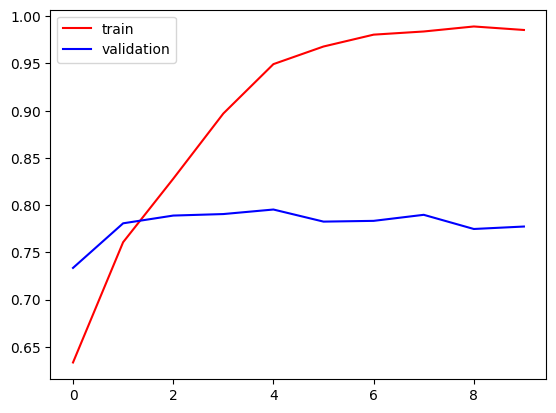

In [19]:
import  matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

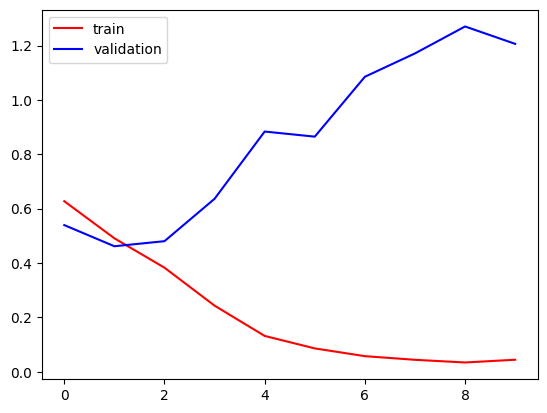

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# So Here We Can see  there is large gap b/w (loss and val_loss) & (accuracy and val_accuracy) So it means our model is  Overfitting


In [22]:
 #Ways to reduce Overfitting

 #Add more data
 #Data Augmentation
 #L1/L2 Regularizer
 #Dropout
 #Batch Norm
 #Reduce Complexity

 #Here We will implement Drop Out and Batch Normalization

In [23]:
from keras.layers import Dropout,BatchNormalization

In [24]:
#ReCreate The CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Batch Normalization Layer Added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Batch Normalization Layer Added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #Batch Normalization Layer Added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1)) #DropOut Layer Added
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1)) #DropOut Layer Added
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 108ms/step - loss: 1.4135 - accuracy: 0.5862 - val_loss: 0.7283 - val_accuracy: 0.5518
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5632 - accuracy: 0.7107 - val_loss: 0.5130 - val_accuracy: 0.7470
Epoch 3/10
625/625 [==============================] - 80s 127ms/step - loss: 0.4742 - accuracy: 0.7737 - val_loss: 0.5684 - val_accuracy: 0.7016
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4174 - accuracy: 0.8095 - val_loss: 0.4473 - val_accuracy: 0.7954
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3503 - accuracy: 0.8473 - val_loss: 0.4514 - val_accuracy: 0.7898
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2827 - accuracy: 0.8798 - val_loss: 0.6510 - val_accuracy: 0.7636
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2216 - accuracy: 0.9087 - val_loss: 0.7796 - val_ac

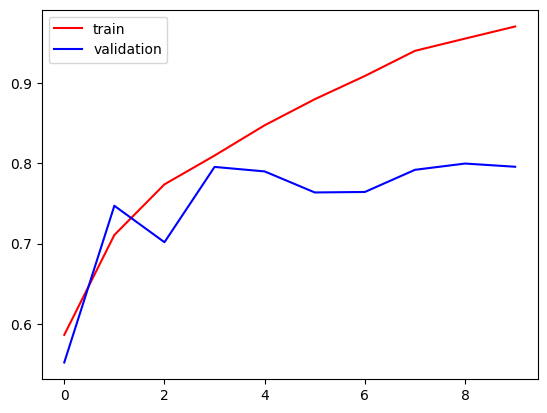

In [28]:
import  matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

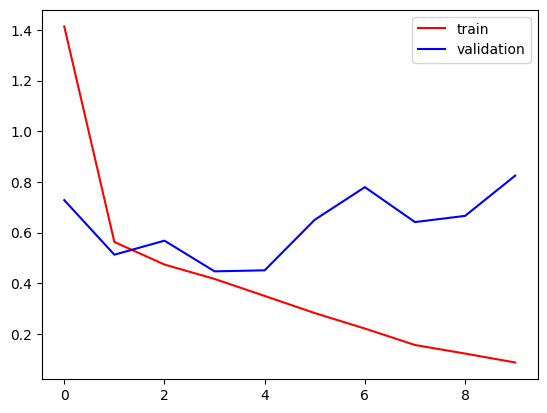

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# So Here We Can see our validation accuracy and val_loss is improved and now there is less gap b/w (loss and val_loss) & (accuracy and val_accuracy) compare to before

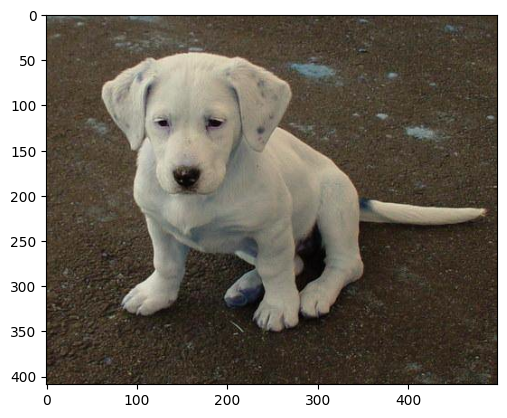

In [78]:
import cv2
test_img=cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [79]:
test_img.shape

(409, 499, 3)

In [80]:
test_img=cv2.resize(test_img,(256,256))

In [81]:
test_input=test_img.reshape((1,256,256,3))

In [82]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)